In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
#current directory
curDir = os.path.curdir

In [3]:
#Train Images directory
train_images = os.path.join(curDir,'Train_Images')

In [4]:
#read all image names in train images dir
images = glob(os.path.join(train_images, "*.png"))

In [5]:
images[0:5]

['.\\Train_Images\\CR_0002.png',
 '.\\Train_Images\\CR_0005.png',
 '.\\Train_Images\\CR_0006.png',
 '.\\Train_Images\\CR_0007.png',
 '.\\Train_Images\\CR_0008.png']

In [6]:
len(images)

640

In [7]:
sample_img = cv.imread(images[100])

In [8]:
type(sample_img)

numpy.ndarray

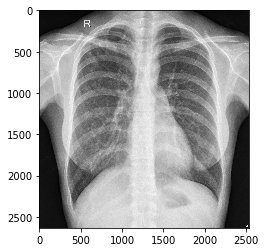

In [9]:
plt.imshow(sample_img)

In [10]:
#Read image and label info
train_data = pd.read_csv('Train_Labels.csv')

In [11]:
train_data.head()

,Images,Labels
0,CR_0258,0
1,CR_0467,1
2,CR_0627,1
3,CR_0516,1
4,CR_0496,1


In [12]:
os.path.basename(images[10]).split('.')[0]

'CR_0014'

In [13]:
TRAIN_DATASET_SIZE = int(len(images) * 0.6)
CV_DATASET_SIZE    = int(len(images) * 0.2)
TEST_DATASET_SIZE  = int(len(images) * 0.2)

In [14]:
print(TRAIN_DATASET_SIZE)
print(CV_DATASET_SIZE)
print(TEST_DATASET_SIZE)

384
128
128


In [39]:
#list(images[TRAIN_DATASET_SIZE+CV_DATASET_SIZE:])

In [40]:
#list(images[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE+CV_DATASET_SIZE])

In [15]:
images_shuffled = np.random.shuffle(images)

In [16]:
sample_image = os.path.basename(images[10]).split('.')[0]
sample_label = train_data[train_data['Images'] == sample_image]

In [17]:
print(sample_image)

MR_0150


In [18]:
sample_label

,Images,Labels
558,MR_0150,1


In [30]:
def load_images_for_training():
    '''
        Read and return images in train images and their corresponding labels
    '''
    x_train = []
    x_cv    = []
    x_test  = []
    
    y_train = []
    y_cv    = []
    y_test  = []
    
    IMG_HEIGHT = 128
    IMG_WIDTH  = 128
    
    #load train data
    for img in images[:TRAIN_DATASET_SIZE]:
        train_img = cv.imread(img)
        img_name = os.path.basename(img).split('.')[0]
        train_label = train_data[train_data['Images'] == img_name]['Labels'].values[0]
        
        x_train.append(cv.resize(train_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        y_train.append(train_label)
    
    #load cross validation data
    for img in images[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE+CV_DATASET_SIZE]:
        cv_img = cv.imread(img)
        img_name = os.path.basename(img).split('.')[0]
        cv_label = train_data[train_data['Images'] == img_name]['Labels'].values[0]
        
        x_cv.append(cv.resize(cv_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        y_cv.append(cv_label)
        
    #load test data
    for img in images[TRAIN_DATASET_SIZE+CV_DATASET_SIZE:]:
        test_img = cv.imread(img)
        img_name = os.path.basename(img).split('.')[0]
        test_label = train_data[train_data['Images'] == img_name]['Labels'].values[0]
        
        x_test.append(cv.resize(test_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        y_test.append(test_label)
        
    return x_train, y_train, x_cv, y_cv, x_test, y_test

In [32]:
x_train, y_train, x_cv, y_cv, x_test, y_test  = load_images_for_training()

In [33]:
#save the data as numpy arrays

#save training data
np.save("Train_image_data",x_train)
np.save("Train_label_data",y_train)

#save cv data
np.save("cv_image_data",x_cv)
np.save("cv_label_data",y_cv)

#save test data
np.save("Test_image_data",x_test)
np.save("Test_label_data",y_test)

In [34]:
test_images = os.path.join(curDir,'Test_Images')

In [35]:
test_imgs = glob(os.path.join(test_images, "*.png"))

In [36]:
def load_test_images():
    '''
        Read images in test images and return the list
    '''
    x = []
    
    IMG_HEIGHT = 128
    IMG_WIDTH  = 128
    
    for img in test_imgs:
        test_img = cv.imread(img)
        x.append(cv.resize(test_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        
    return x

In [37]:
test_x = load_test_images()

In [38]:
#save the data as numpy arrays
np.save("image_data_for_submission",test_x)

In [75]:
train_df = pd.DataFrame()

In [76]:
train_df['labels'] = y
train_df['images'] = x

In [84]:
#plt.imshow(train_df['images'][0])